In [1]:
import numpy as np
import pygrib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pyproj import Proj
from scipy.interpolate import RegularGridInterpolator
import h5py
from datetime import datetime, timedelta

In [23]:
lon1, lat1 = 360-50, -15
lon2, lat2 = 360-5, 20
N = 7
dates = ['20220302']
nt = N * 1

grbs = pygrib.open(f'../data/cds/0.5/1000/{dates[0]}.grb2')
grb = grbs.select(name='U component of wind', level=1000)[0]
x = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[2].transpose()
y = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[1].transpose()
t0 = datetime(int(dates[0][:4]), int(dates[0][4:6]), int(dates[0][6:8]))
tf = t0 + timedelta(hours=21)
t = np.linspace(t0.timestamp(), tf.timestamp(), nt)

nx, ny = x.shape
rain_dyn = np.zeros((nt, nx, ny))

for date in dates:
    for n in range(7):
        grbs = pygrib.open(f'../data/cds/0.5/1000/{date}.grb2')
        grb = grbs.select(name='U component of wind', level=1000)[n]
        u = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[0]

        grbs = pygrib.open(f'../data/cds/0.5/1000/{date}.grb2')
        grb = grbs.select(name='V component of wind', level=1000)[n]
        v = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[0]

        grbs = pygrib.open(f'../data/cds/0.5/1000/{date}.grb2')
        grb = grbs.select(name='Specific rain water content', level=1000)[n]
        rain = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[0].transpose()
        rain_dyn[n, :, :] = rain

ValueError: no matches found

In [75]:
lon1, lat1 = -50, -15
lon2, lat2 = -5, 20
nt = 24

#grbs = pygrib.open(f'../data/cds/0.5/1000/{dates[0]}.grb2')
grbs = pygrib.open('download.grib')
grb = grbs.select(name='Convective precipitation')[0]
x = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[2].transpose()
y = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[1].transpose()
t0 = datetime(2020, 7, 15)
tf = t0 + timedelta(hours=23)
t = np.linspace(t0.timestamp(), tf.timestamp(), nt)

nx, ny = x.shape
rain_dyn = np.zeros((nt, nx, ny))

for date in dates:
    for n in range(nt):
        grbs = pygrib.open('download.grib')
        grb = grbs.select(name='Convective precipitation',)[n]
        rain = grb.data(lon1=lon1, lat1=lat1, lon2=lon2, lat2=lat2)[0].transpose()
        rain_dyn[n, :, :] = rain

In [10]:
itp = RegularGridInterpolator((t, x[:, 0], y[0, :]), rain_dyn, 'linear')

In [11]:
Nt = 50
rain_itp = np.zeros((Nt, nx, ny))
for n in range(Nt):
    for i in range(nx):
        for j in range(ny):
            tt = t[0] + n*(t[-1] - t[0])/(Nt-1)
            rain_itp[n, i, j] = itp((tt, x[i,j], y[i,j]))

In [58]:
import sys
sys.path.append('/home/bastien/Documents/work/dabry/src')
from dabry.misc import Utils
import h5py
with h5py.File('test.h5', 'w') as f:
    f.attrs['coords'] = 'gcs'
    f.attrs['units_grid'] = Utils.U_RAD
    f.attrs['analytical'] = False
    dset = f.create_dataset('data', (nt, nx, ny), dtype='f8')
    dset[:] = rain_dyn
    dset = f.create_dataset('ts', (nt,), dtype='f8')
    dset[:] = t
    dset = f.create_dataset('grid', (nx, ny, 2), dtype='f8')
    grid = np.stack((x-360,y), axis=2)
    dset[:] = Utils.DEG_TO_RAD * grid

In [76]:
import sys
sys.path.append('/home/bastien/Documents/work/dabry/src')
from dabry.misc import Utils
import h5py
with h5py.File('test.h5', 'w') as f:
    f.attrs['coords'] = 'gcs'
    f.attrs['units_grid'] = Utils.U_RAD
    f.attrs['analytical'] = False
    dset = f.create_dataset('data', (nt, nx, ny), dtype='f8')
    dset[:] = rain_dyn
    dset = f.create_dataset('ts', (nt,), dtype='f8')
    dset[:] = t
    dset = f.create_dataset('grid', (nx, ny, 2), dtype='f8')
    grid = np.stack((x,y), axis=2)
    dset[:] = Utils.DEG_TO_RAD * grid

In [77]:
with h5py.File('test.h5', 'r') as f:
    print(list(map(datetime.fromtimestamp, np.array(f['ts']))))

[datetime.datetime(2020, 7, 15, 0, 0), datetime.datetime(2020, 7, 15, 1, 0), datetime.datetime(2020, 7, 15, 2, 0), datetime.datetime(2020, 7, 15, 3, 0), datetime.datetime(2020, 7, 15, 4, 0), datetime.datetime(2020, 7, 15, 5, 0), datetime.datetime(2020, 7, 15, 6, 0), datetime.datetime(2020, 7, 15, 7, 0), datetime.datetime(2020, 7, 15, 8, 0), datetime.datetime(2020, 7, 15, 9, 0), datetime.datetime(2020, 7, 15, 10, 0), datetime.datetime(2020, 7, 15, 11, 0), datetime.datetime(2020, 7, 15, 12, 0), datetime.datetime(2020, 7, 15, 13, 0), datetime.datetime(2020, 7, 15, 14, 0), datetime.datetime(2020, 7, 15, 15, 0), datetime.datetime(2020, 7, 15, 16, 0), datetime.datetime(2020, 7, 15, 17, 0), datetime.datetime(2020, 7, 15, 18, 0), datetime.datetime(2020, 7, 15, 19, 0), datetime.datetime(2020, 7, 15, 20, 0), datetime.datetime(2020, 7, 15, 21, 0), datetime.datetime(2020, 7, 15, 22, 0), datetime.datetime(2020, 7, 15, 23, 0)]


In [5]:
import sys
sys.path.append('/home/bastien/Documents/work/dabry/src')
from dabry.penalty import DiscretePenalty

In [26]:
p = DiscretePenalty()

In [27]:
p.load('test.h5')

In [28]:
list(map(datetime.fromtimestamp, p.ts))

[datetime.datetime(2022, 3, 3, 0, 0),
 datetime.datetime(2022, 3, 3, 3, 0),
 datetime.datetime(2022, 3, 3, 6, 0),
 datetime.datetime(2022, 3, 3, 9, 0),
 datetime.datetime(2022, 3, 3, 12, 0),
 datetime.datetime(2022, 3, 3, 15, 0),
 datetime.datetime(2022, 3, 3, 18, 0),
 datetime.datetime(2022, 3, 3, 21, 0)]

In [32]:
p.value(np.array((datetime(2022, 3, 3, 6, 0).timestamp(), 5.7-2*np.pi, 0.1)))

array([1.28442474e-07])

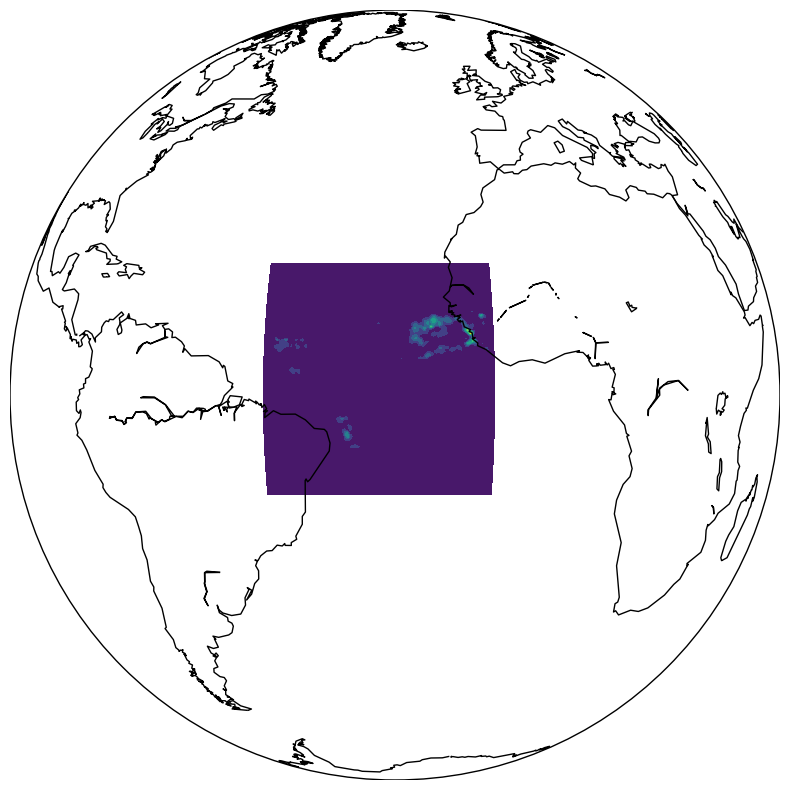

In [69]:
fig, ax = plt.subplots(figsize=(14,10))
bm = Basemap(resolution='c', projection='ortho', lat_0=0, lon_0=-25)
proj = Proj(proj='ortho', lat_0=0, lon_0=-25)
bm.drawcoastlines()
bm.contourf(x, y, rain_dyn[23], latlon=True)
plt.show()

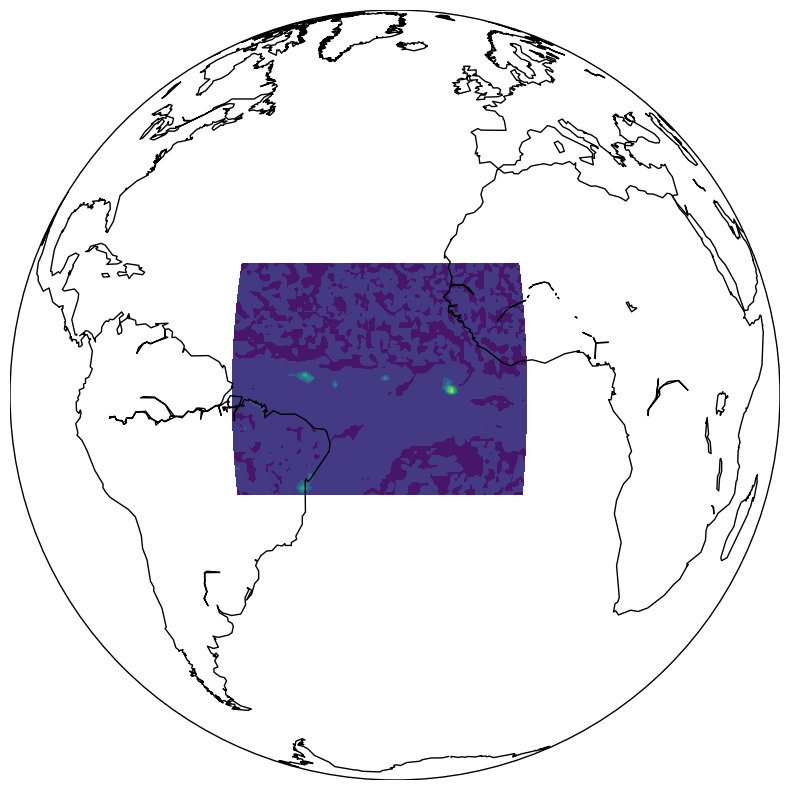

In [13]:
fig, ax = plt.subplots(figsize=(14,10))
bm = Basemap(resolution='c', projection='ortho', lat_0=0, lon_0=-25)
proj = Proj(proj='ortho', lat_0=0, lon_0=-25)
bm.drawcoastlines()
bm.contourf(x, y, rain_itp[40], latlon=True)
plt.show()

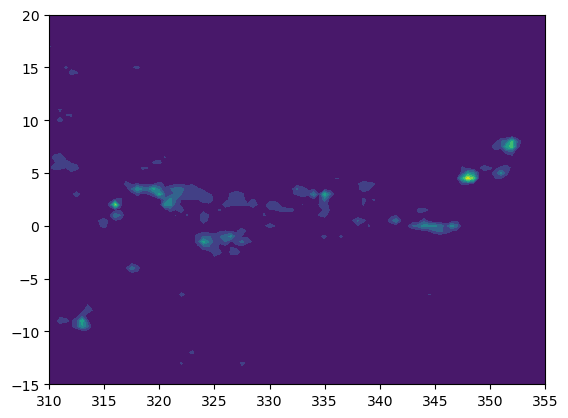

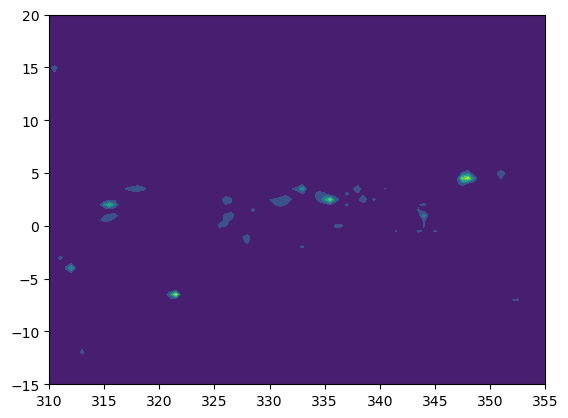

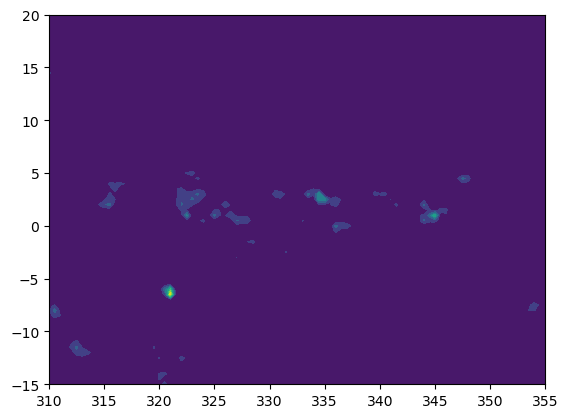

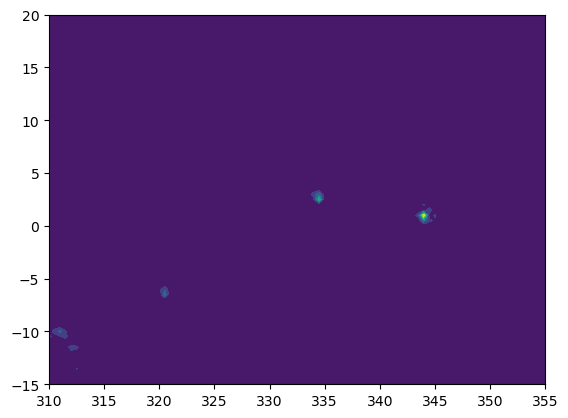

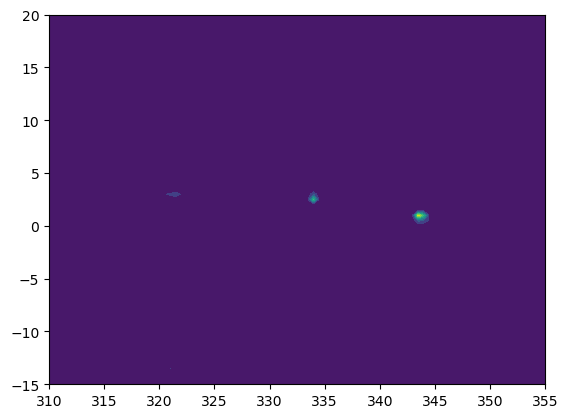

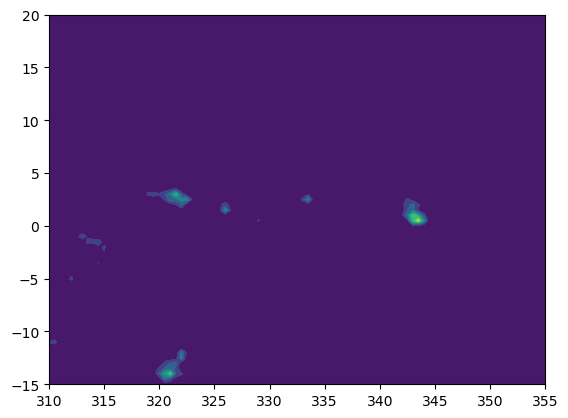

In [4]:
plt.contourf(x, y, rain_dyn[0])
plt.show()
plt.contourf(x, y, rain_dyn[1])
plt.show()
plt.contourf(x, y, rain_dyn[2])
plt.show()
plt.contourf(x, y, rain_dyn[3])
plt.show()
plt.contourf(x, y, rain_dyn[4])
plt.show()
plt.contourf(x, y, rain_dyn[5])
plt.show()

In [46]:
10000*rain_itp[16, 40]

0.11235475540161134

In [6]:
plt.show()

In [71]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': 'convective_precipitation',
        'year': '2020',
        'month': '07',
        'day': '15',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            20, -45, -15,
            -10,
        ],
    },
    'download.grib')

2023-07-13 12:38:10,219 INFO Welcome to the CDS
2023-07-13 12:38:10,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-07-13 12:38:10,392 INFO Request is queued
2023-07-13 12:38:11,433 INFO Request is running
2023-07-13 12:38:15,266 INFO Request is completed
2023-07-13 12:38:15,268 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1689244689.7338169-22147-6-a2ab7e9d-7ac4-4216-b73d-41f237b45028.grib to download.grib (936.6K)
2023-07-13 12:38:15,997 INFO Download rate 1.3M/s                               


Result(content_length=959040,content_type=application/x-grib,location=https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/adaptor.mars.internal-1689244689.7338169-22147-6-a2ab7e9d-7ac4-4216-b73d-41f237b45028.grib)